### Import libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


### Load inputs

In [58]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

### EDA

In [59]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [60]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [61]:
sample_sub.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
ID                         88858 non-null object
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          79858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
ID                         59310 non-null object
Estimated_Insects_Count    59310 non-null int64
Crop_Type                  59310 non-null int64
Soil_Type                  59310 non-null int64
Pesticide_Use_Category     59310 non-null int64
Number_Doses_Week          59310 non-null int64
Number_Weeks_Used          53417 non-null float64
Number_Weeks_Quit          59310 non-null int64
Season                     59310 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


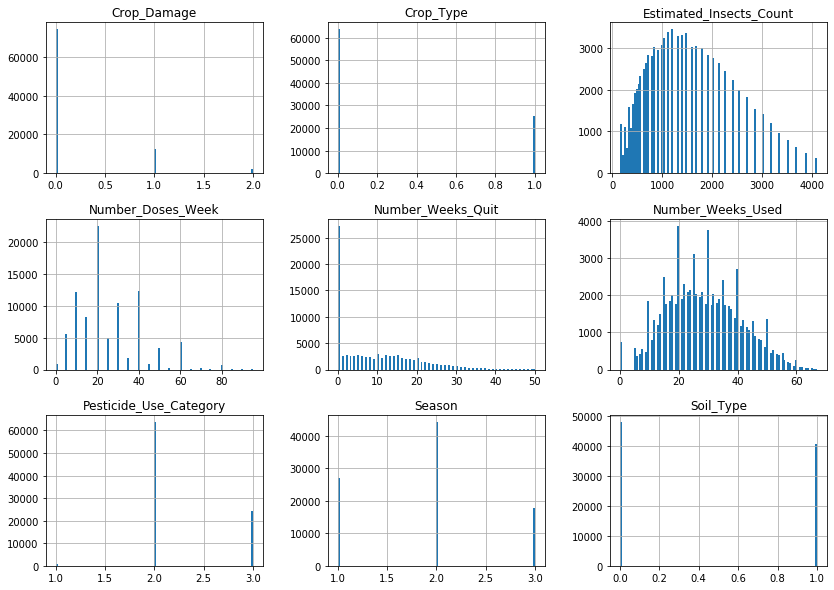

In [64]:
# fig,ax = plt.subplots(figsize =(10,10))
train.hist(figsize = (14,10),bins = 100)
plt.show()

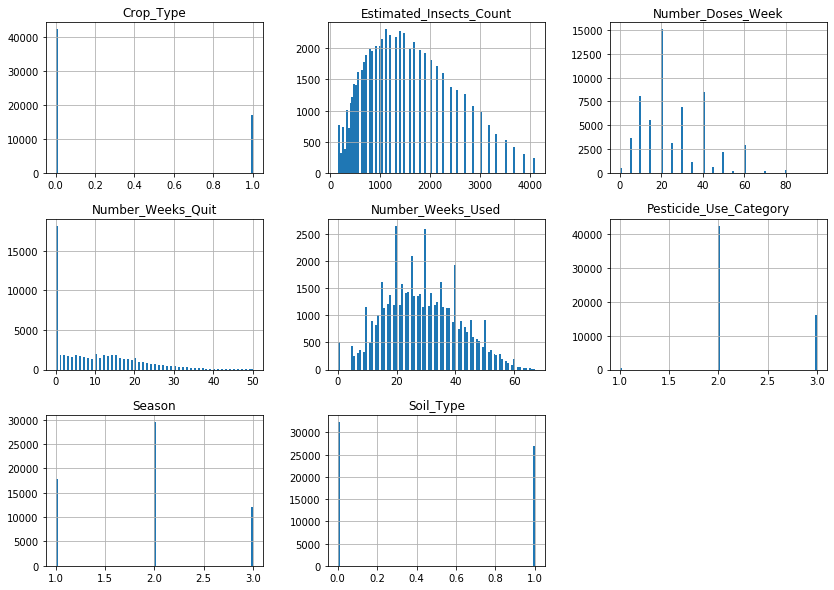

In [65]:
test.hist(figsize = (14,10),bins = 100)
plt.show()

### One-ways

In [66]:
train['missing_used_weeks'] = 0
train.loc[train.Number_Weeks_Used.isna(),'missing_used_weeks'] =1

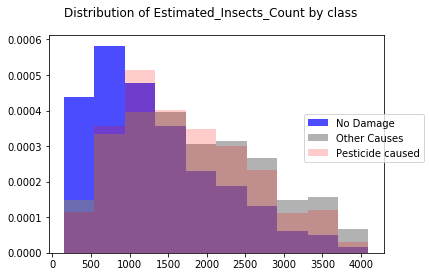

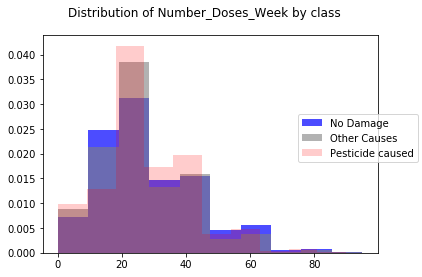

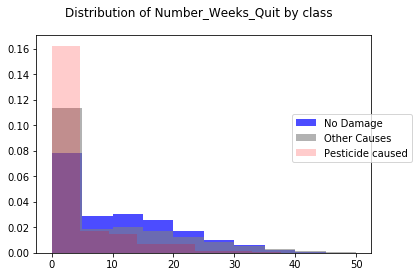

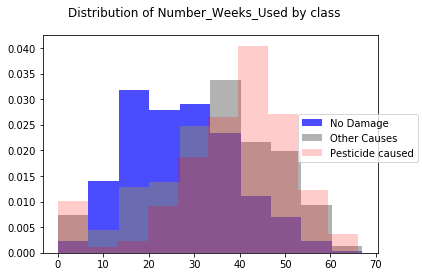

In [153]:
numeric_columns =['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit',
                  'Number_Weeks_Used']
fig = {}
ax = {}
for i,col in enumerate(numeric_columns):
    fig[i] = plt.figure()
    ax[i] = plt.hist(train[col][train.Crop_Damage==0] , label ='No Damage', color = 'blue',alpha =0.7, density = True)
    ax[i] = plt.hist(train[col][train.Crop_Damage==1] , label ='Other Causes', color = 'grey',alpha =0.6, density = True)
    ax[i] = plt.hist(train[col][train.Crop_Damage==2] , label ='Pesticide caused', color = 'red',alpha =0.2,density = True)
    fig[i].suptitle('Distribution of '+ col+ ' by class')
    fig[i].legend(loc = 'right')
#     print(train[col].count())

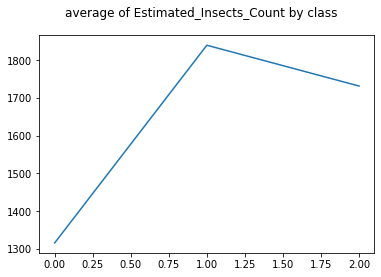

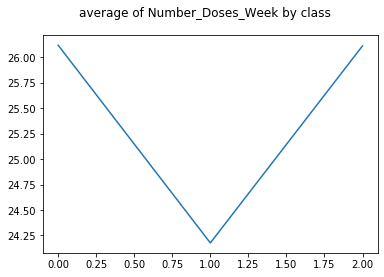

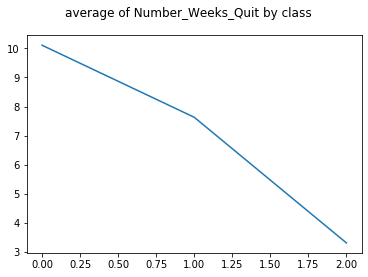

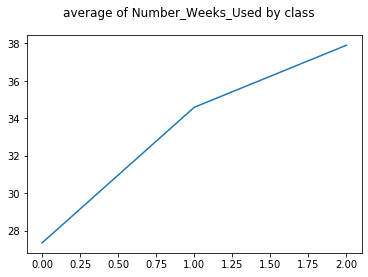

In [68]:
numeric_columns =['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit',
                  'Number_Weeks_Used']
fig = {}
ax = {}
for i,col in enumerate(numeric_columns):
    grouped = train.groupby('Crop_Damage')[col].mean().reset_index()
    fig[i] = plt.figure()
    ax[i] = plt.plot( grouped['Crop_Damage'], grouped[col])
    fig[i].suptitle('average of '+ col+ ' by class')

In [97]:
train.groupby('Crop_Damage')['ID'].count().reset_index()

,Crop_Damage,ID
0,0,74238
1,1,12307
2,2,2313


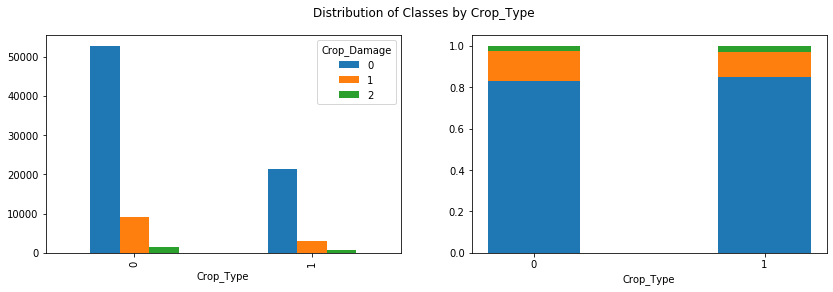

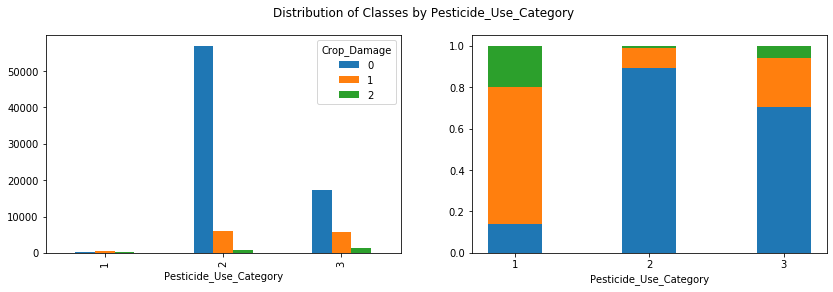

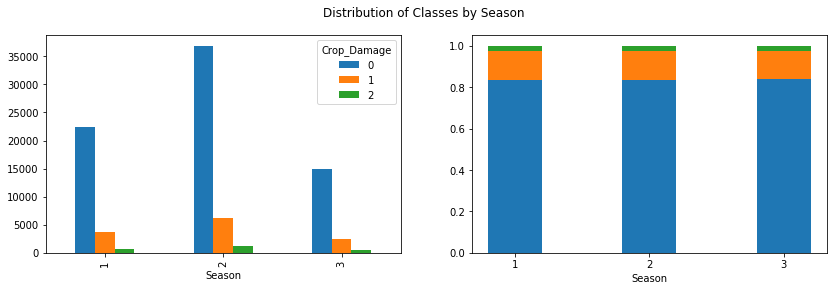

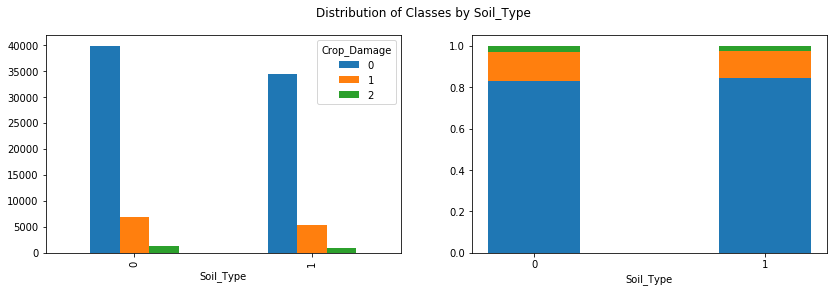

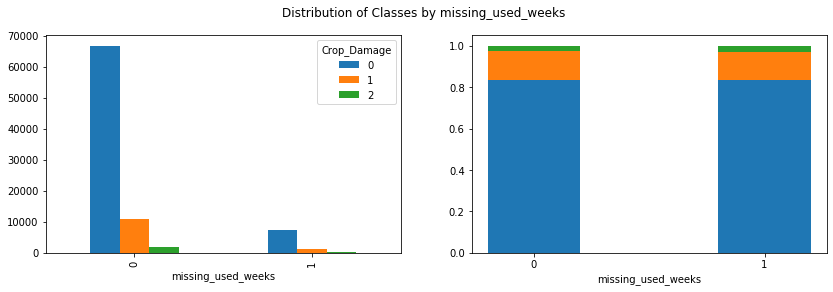

In [151]:
categorical_cols = ['Crop_Type','Pesticide_Use_Category','Season','Soil_Type','missing_used_weeks']

for i, col in enumerate(categorical_cols):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
    train.groupby([col,'Crop_Damage'])['ID'].count().unstack().plot.bar(ax = ax1)
    grouped = train.groupby([col,'Crop_Damage'])['ID'].count().reset_index()
    grouped['height'] = grouped['ID'] / grouped.groupby(col)['ID'].transform(sum)
    bottom = 0
    for lab in grouped.Crop_Damage.unique():
        x = grouped.loc[grouped.Crop_Damage==lab,col].astype('str')
        h = grouped.loc[grouped.Crop_Damage==lab,'height'] 
        ax2.bar(x,h, label = lab ,width =0.4, bottom = bottom) 
        ax2.set_xlabel(col)
        bottom = bottom + h.values
    fig.suptitle('Distribution of Classes by '+ col )
